## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [4]:
boston_features.head(2)

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 250]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.9,4.98,1,0,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.9,9.14,1,0,0,0,1,0,0,0,0


In [5]:
boston_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT', 'RAD_(0, 3]', 'RAD_(3, 4]', 'RAD_(4, 5]', 'RAD_(5, 24]',
       'TAX_(0, 250]', 'TAX_(250, 300]', 'TAX_(300, 360]', 'TAX_(360, 460]',
       'TAX_(460, 712]'],
      dtype='object')

In [9]:
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,3))

# for xcol, ax in zip([['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
#        'LSTAT']], axes):
#     boston_features.plot(kind='scatter', x=xcol, y='CRIM')

In [11]:
boston_features_2 = boston_features[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT']]

## Perform log transformations for the variables where it makes sense

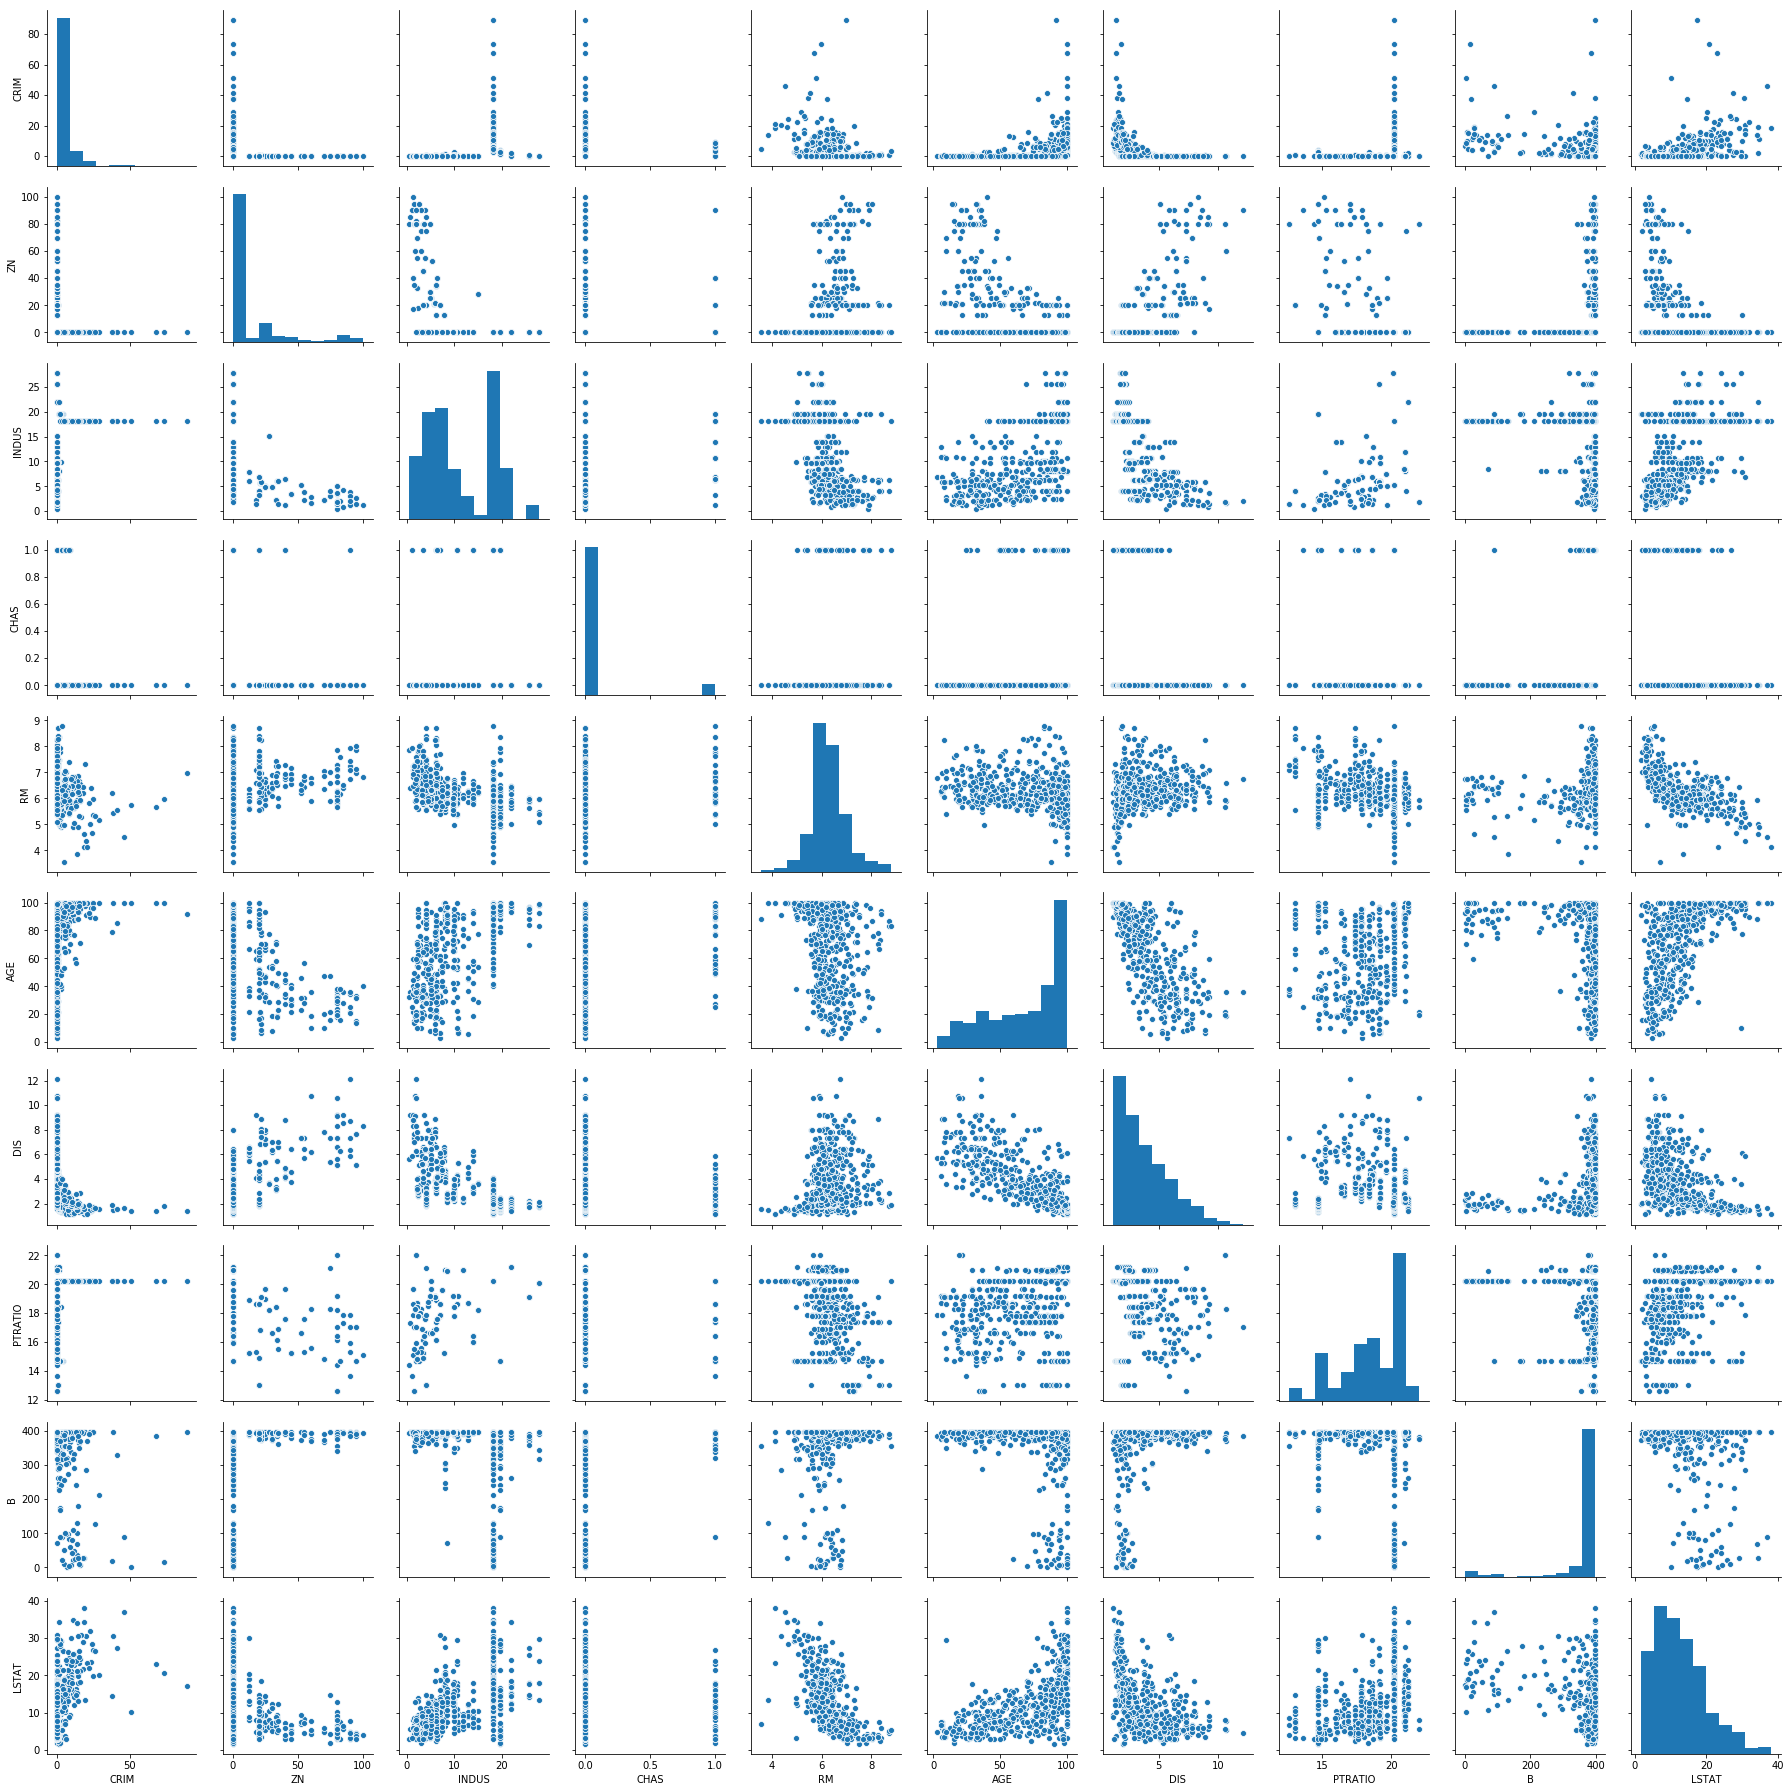

In [13]:
 sns.pairplot(boston_features_2)

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [15]:
boston_features_3 = boston_features_2

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [ ]:
boston_features_3['log_ZN']= 

In [33]:
boston_features_3.ZN.head()

0    18.0
1     0.0
2     0.0
3     0.0
4     0.0
Name: ZN, dtype: float64

In [31]:
boston_features_3['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

## Try different types of transformations on the continuous variables

In [ ]:
boston_features_3['ZN']

In [41]:
holding_list=[0.0]*len(boston_features_3['ZN'])
for index, value in enumerate(boston_features_3['ZN']):
    if value > 0.0:
        #print(value)
        holding_list[index] = np.log(boston_features_3['ZN'])

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [42]:
holding_list

[0      2.890372
 1          -inf
 2          -inf
 3          -inf
 4          -inf
 5          -inf
 6      2.525729
 7      2.525729
 8      2.525729
 9      2.525729
 10     2.525729
 11     2.525729
 12     2.525729
 13         -inf
 14         -inf
 15         -inf
 16         -inf
 17         -inf
 18         -inf
 19         -inf
 20         -inf
 21         -inf
 22         -inf
 23         -inf
 24         -inf
 25         -inf
 26         -inf
 27         -inf
 28         -inf
 29         -inf
          ...   
 476        -inf
 477        -inf
 478        -inf
 479        -inf
 480        -inf
 481        -inf
 482        -inf
 483        -inf
 484        -inf
 485        -inf
 486        -inf
 487        -inf
 488        -inf
 489        -inf
 490        -inf
 491        -inf
 492        -inf
 493        -inf
 494        -inf
 495        -inf
 496        -inf
 497        -inf
 498        -inf
 499        -inf
 500        -inf
 501        -inf
 502        -inf
 503        -i

Store your final features in a dataframe `features_final`

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.